In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import statistics
import itertools

%matplotlib inline

In [2]:
def generate_box_plots(runtime, parameters, snaps):
    for par in parameters:
        data = []
        label = []
        for snap in snaps:
            gpu = runtime[f'gpu_{snap}_{par}'][2:]
            if par == 'maxmem':
                gpu = np.array(gpu)/(1024)**3
            data.append(gpu)
            label.append(f'gpu_snaps_{snap}')
        
        fig = plt.figure(figsize =(10, 6))
        ax = fig.add_subplot(111)
        # Creating axes instance
        bp = ax.boxplot(data, patch_artist = True,
                        notch = False, vert = 0)

        colors = ['tab:green', 'tab:green', 'tab:green']
        colors_median = ['orange', 'orange', 'orange']

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color ='#8B008B',
                    linewidth = 2)

        # changing color and linewidth of
        # medians
        for median, color in zip(bp['medians'], colors_median):
            median.set(color = color,
                       linewidth = 3)

        # changing style of fliers
        for flier in bp['fliers']:
            flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

        # x-axis labels
        ax.set_yticklabels(label, fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        if par == 'infsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
        elif par == 'inference':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        elif par == 'netsetup':
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        else:
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Adding title
        plt.title(par, fontsize=16)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

        # show plot
        plt.show(bp)

In [3]:
filehandler = open('GP_runtime_gpuscaling.pkl', 'rb')
gp_runtime = pickle.load(filehandler)

In [4]:
for name, numbers in gp_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: gpu_1_maxmem Used 28 times
	MEDIAN 5530505216.0
	MEAN   5530505216
	MAX  5530505216
	MIN  5530505216
Item: gpu_1_netsetup Used 28 times
	MEDIAN 0.0031310319900512695
	MEAN   0.0031399641718183246
	MAX  0.0035119056701660156
	MIN  0.0028963088989257812
Item: gpu_1_infsetup Used 28 times
	MEDIAN 0.00016009807586669922
	MEAN   0.00016147749764578684
	MAX  0.00019669532775878906
	MIN  0.00013685226440429688
Item: gpu_1_inference Used 28 times
	MEDIAN 2.526210069656372
	MEAN   2.52512503521783
	MAX  2.5350100994110107
	MIN  2.508751630783081
Item: gpu_2_maxmem Used 27 times
	MEDIAN 2775693312
	MEAN   2775693312
	MAX  2775693312
	MIN  2775693312
Item: gpu_2_netsetup Used 27 times
	MEDIAN 0.003622293472290039
	MEAN   0.003621657689412435
	MAX  0.004018068313598633
	MIN  0.003173828125
Item: gpu_2_infsetup Used 27 times
	MEDIAN 0.0001785755157470703
	MEAN   0.000175423092312283
	MAX  0.0002048015594482422
	MIN  0.0001399517059326172
Item: gpu_2_inference Used 27 times
	MEDIAN 1.358272075

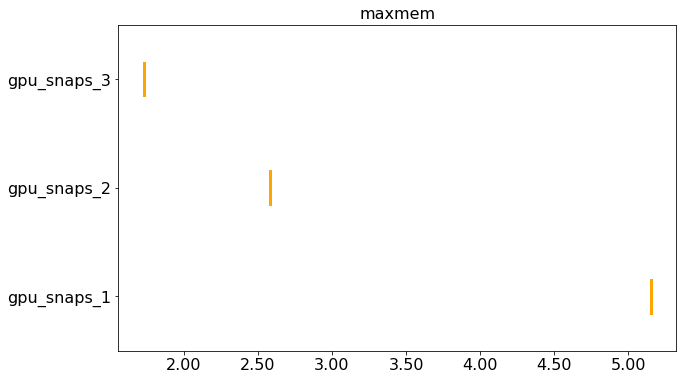

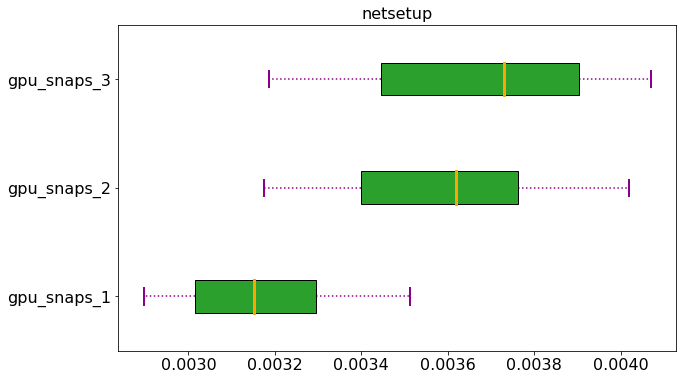

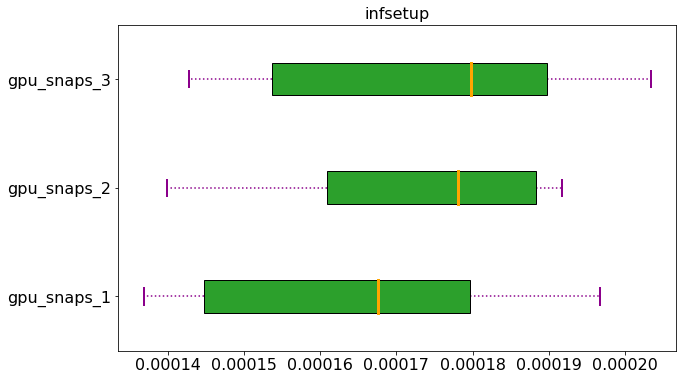

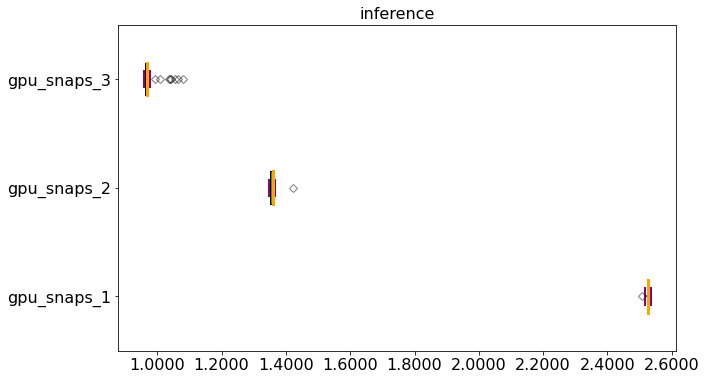

In [5]:
gpus = ["1", "2", "3"]
par = ["maxmem", "netsetup", "infsetup", "inference"]
generate_box_plots(gp_runtime, par, gpus)

In [6]:
gp_inference_rbf = []
for gpu in gpus:
    gpu_inf = statistics.median(gp_runtime[f'gpu_{gpu}_inference'])
    gp_inference_rbf.append(gpu_inf)
    
gp_inference_rbf = np.array(gp_inference_rbf)

In [7]:
gp_inference_rbf

array([2.52621007, 1.35827208, 0.96731162])

In [8]:
N = np.array([1, 2, 3])

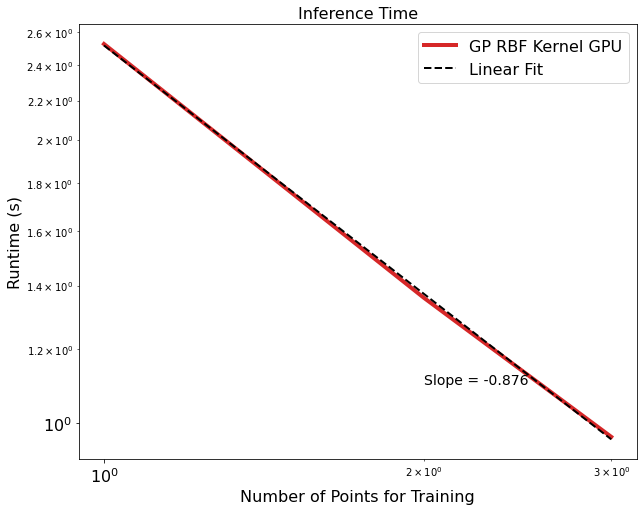

In [9]:
mlog1, blog1 = np.polyfit(np.log(N), np.log(gp_inference_rbf), 1)
ydata1 = np.exp(mlog1*np.log(N) + blog1)

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, gp_inference_rbf, color='tab:red', linestyle='-', label='GP RBF Kernel GPU', linewidth=4)

ax.plot(N, ydata1, linestyle='--', color='black', label='Linear Fit', linewidth=2)
plt.text(2, 1.1, "Slope = {:.3f}".format(mlog1), fontsize=14, color='black')

plt.title("Inference Time", fontsize=16)
plt.xlabel("Number of Points for Training", fontsize=16)
plt.ylabel("Runtime (s)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')

In [10]:
gp_memory_rbf = []
for gpu in gpus:
    gpu_mem = statistics.median(gp_runtime[f'gpu_{gpu}_maxmem'])
    gp_memory_rbf.append(gpu_mem)
    
gp_memory_rbf = np.array(gp_memory_rbf)/1024**2

In [11]:
gp_memory_rbf

array([5274.30078125, 2647.10742188, 1771.10742188])

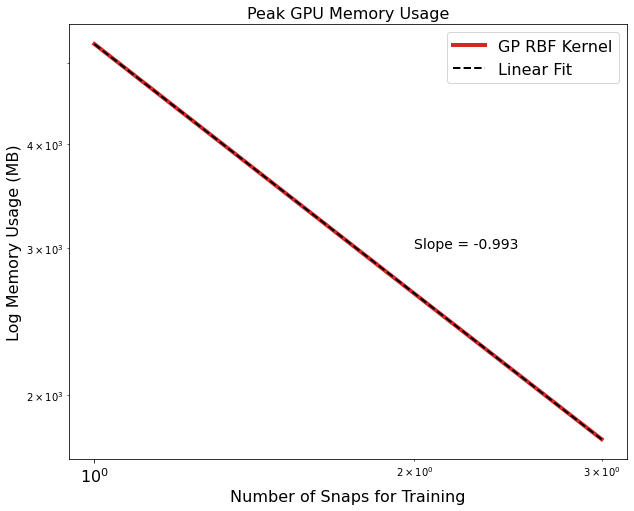

In [12]:
mlog, blog = np.polyfit(np.log(N), np.log(gp_memory_rbf), 1)
ydata = np.exp(mlog*np.log(N) + blog)

#plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize =(10, 8))
ax = plt.axes()
ax.plot(N, gp_memory_rbf, color='tab:red', linestyle='-', label='GP RBF Kernel', linewidth=4)
ax.plot(N, ydata, linestyle='--', color='black', label='Linear Fit', linewidth=2)
plt.text(2, 3e3, "Slope = {:.3f}".format(mlog), fontsize=14, color='black')
plt.title("Peak GPU Memory Usage", fontsize=16)
plt.xlabel("Number of Snaps for Training", fontsize=16)
plt.ylabel("Log Memory Usage (MB)", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
plt.xscale('log')